### LIBRARIES USED

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from boruta import BorutaPy
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE


### LOADING DATASET

In [2]:
bank_lend=pd.read_table('D:\PYTHON PROJECT IMARTICUS/XYZCorp_LendingData.txt',parse_dates=['issue_d'],low_memory=False)


In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
bank_lend.head(2)


In [ ]:
bank_lend.shape

In [ ]:
bank_lend.info()

In [ ]:
bank_lend.describe().transpose()

### DATA CLEANING

#### UNIQUE IDENTIFIER


In [ ]:
#bank_lend.term.unique()
#bank_lend.grade.unique()
#bank_lend.sub_grade.unique()
#bank_lend.emp_title.unique()
#bank_lend.emp_length.unique()
#bank_lend.home_ownership.unique()
#bank_lend.verification_status.unique()
#bank_lend.pymnt_plan .unique()
#bank_lend.desc.unique() -confused
#bank_lend.purpose.unique()
#bank_lend.title.unique()
#bank_lend.zip_code.unique()
#bank_lend.addr_state.unique()
#bank_lend.delinq_2yrs.unique()
#bank_lend.earliest_cr_line.unique()
#bank_lend.initial_list_status.unique()
#bank_lend.out_prncp.unique()
#bank_lend.application_type.unique()
#bank_lend.verification_status_joint.unique()
#bank_lend.default_ind.unique()



In [3]:
# Dropping these columns as they are unique identifier.
bank_lend=bank_lend.drop('id',axis=1)
bank_lend=bank_lend.drop('member_id',axis=1)


#### NULL VALUE TREATMENT

In [4]:
# The below columns need to be in object dtype.
# Changing dtype of below columns.
bank_lend.collections_12_mths_ex_med=bank_lend.collections_12_mths_ex_med.astype('object')
bank_lend.next_pymnt_d=bank_lend.next_pymnt_d.astype('object')

In [ ]:
# Checking the presence of nulls in a dataset.
bank_lend.isnull().values.any()
# YES, we have null values present in our dataset.

In [ ]:
# checking the column wise presence of nulls.
bank_lend.isnull().sum()

In [ ]:
# Checking the percentage of nulls present in each column.
# IF the value exceed 75% then we willremove that column else we will keep the column and will do the imputation.
bank_lend.isnull().sum()/bank_lend.shape[0]*100

In [ ]:
col=bank_lend.isnull().sum()/bank_lend.shape[0]*100
col=col[col.values>50]


In [ ]:
len(col.index)

In [ ]:
na_col=bank_lend.isnull().sum()
na_col=na_col[na_col.values>(0.5*len(bank_lend))]
plt.figure(figsize=(20,4))
na_col.plot(kind='bar')
plt.title('Columns with more than 50% Nulls')
plt.show()


In [5]:
columns_to_be_removed=['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m']

In [6]:
bank_lend=bank_lend.drop(columns_to_be_removed,axis=1)

In [7]:
bank_lend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   855969 non-null  float64       
 1   funded_amnt                 855969 non-null  float64       
 2   funded_amnt_inv             855969 non-null  float64       
 3   term                        855969 non-null  object        
 4   int_rate                    855969 non-null  float64       
 5   installment                 855969 non-null  float64       
 6   grade                       855969 non-null  object        
 7   sub_grade                   855969 non-null  object        
 8   emp_title                   806526 non-null  object        
 9   emp_length                  812908 non-null  object        
 10  home_ownership              855969 non-null  object        
 11  annual_inc                  855969 non-

#### NULL IMPUTATION WIH MEAN AND MODE

In [ ]:
#bank_lend.emp_title.mode()
#bank_lend.emp_length.mode()
#bank_lend.title.mode()
#bank_lend.mths_since_last_delinq.mean()
#bank_lend.revol_util.mean()
#(bank_lend.collections_12_mths_ex_med.mode())
#bank_lend.tot_coll_amt.
#bank_lend.tot_cur_bal.mean()    
#bank_lend.total_rev_hi_lim.mean()
#bank_lend.last_pymnt_d.isnull().sum()

In [8]:
bank_lend.emp_title.fillna('Teacher',inplace=True)
bank_lend.emp_length.fillna('10+ years',inplace=True)
bank_lend.title.fillna('Debt consolidation',inplace=True)
bank_lend.collections_12_mths_ex_med.fillna('0',inplace=True)


In [9]:
bank_lend.tot_coll_amt.fillna(bank_lend.tot_coll_amt.mean(),inplace=True)
bank_lend.tot_cur_bal.fillna(bank_lend.tot_cur_bal.mean(),inplace=True)                 
bank_lend.total_rev_hi_lim.fillna(bank_lend.total_rev_hi_lim.mean(),inplace=True)           
bank_lend.revol_util.fillna(bank_lend.revol_util.mean(),inplace=True)


In [10]:
bank_lend.next_pymnt_d.fillna('Feb-2016',inplace=True)
bank_lend.last_credit_pull_d.fillna("Jan-2016",inplace=True)
bank_lend.last_pymnt_d.fillna('Jan-2016',inplace=True)

In [11]:
bank_lend.shape
# After data cleaning and null imputation we are left with 51 features.

(855969, 50)

In [12]:
bank_lend.isnull().values.any()

False

##### UNWANTED COLUMNS REMOVAL

In [13]:
# The below columns do not add any value.

In [14]:
bank_lend=bank_lend.drop('title',axis=1)
bank_lend=bank_lend.drop('emp_title',axis=1)
bank_lend=bank_lend.drop(['zip_code'],axis=1)
bank_lend=bank_lend.drop('next_pymnt_d',axis=1)
bank_lend=bank_lend.drop('last_credit_pull_d',axis=1)
bank_lend=bank_lend.drop('last_pymnt_d',axis=1)
bank_lend=bank_lend.drop('earliest_cr_line',axis=1)
bank_lend=bank_lend.drop('pymnt_plan',axis=1)
bank_lend=bank_lend.drop('collection_recovery_fee',axis=1)
bank_lend=bank_lend.drop('policy_code',axis=1)


In [15]:
bank_lend.shape

(855969, 40)

### EXPLORATORY DATA  ANALYSIS

#### TARGET VARIABLE

In [ ]:
# Target Variable
#'default_ind' is our target as that is the dependent variable we are trying to predict.
# The class 0 indicated non defaulter on the other hand class 1 indicates defaulter.

In [ ]:
print(bank_lend.default_ind.value_counts())
bank_lend.default_ind.value_counts().plot.bar()


In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,7))
sns.countplot(bank_lend['default_ind'], alpha =1, palette= ['green','red'])
plt.title('Non-Defaulters vs Defaulters',size=15)
plt.ylabel('No of Customers ')
plt.show()

In [ ]:
# The majority of the customers are non defaulter.
# on the  contrary, very few customer has defaulter status.Positive examples = 1533
# Proportion of non-defaulter todefaukter is 5.7%.


##### OBJECT VARIABLES

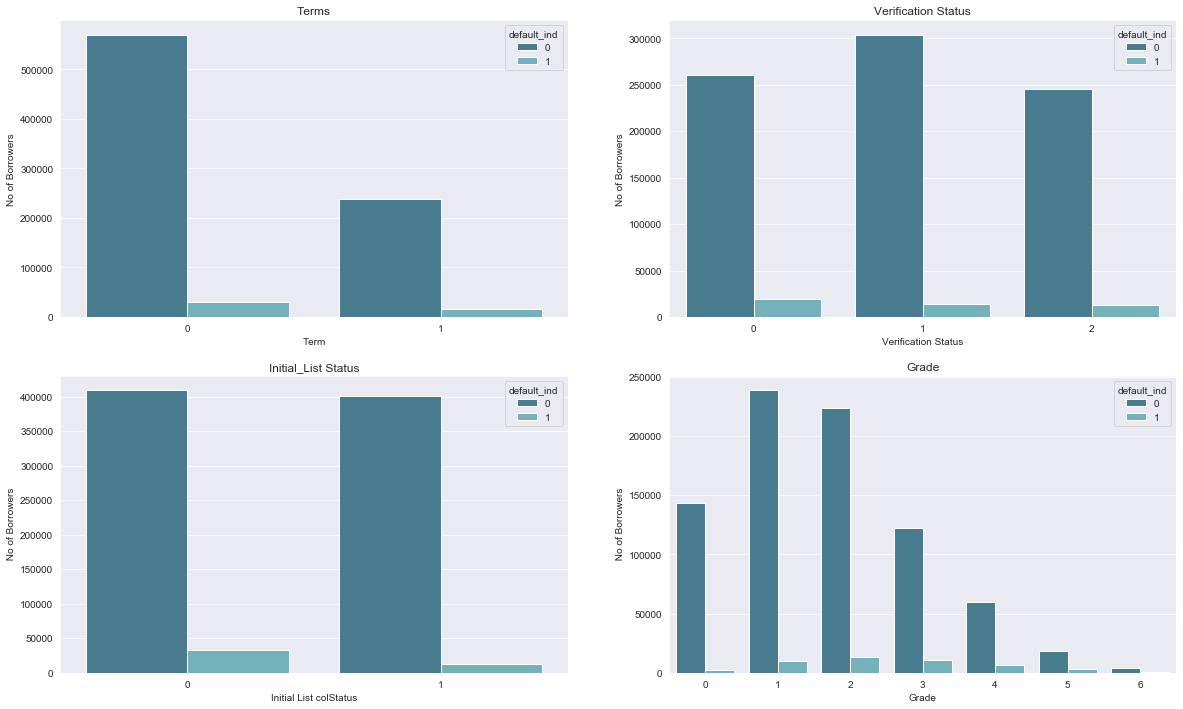

In [218]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(2,2, figsize = (20,12))

# Plot [0]
sns.countplot(bank_lend['term'],hue=bank_lend['default_ind'], palette = 'GnBu_d', ax = axes[0,0])
axes[0,0].set_xlabel('Term')
axes[0,0].set_ylabel('No of Borrowers')
axes[0,0].set_title('Terms')
# Plot [1]
sns.countplot(bank_lend['verification_status'],hue=bank_lend['default_ind'], palette = 'GnBu_d',ax = axes[0,1])
axes[0,1].set_xlabel('Verification Status')
axes[0,1].set_ylabel('No of Borrowers')
axes[0,1].set_title('Verification Status')

sns.countplot(bank_lend['initial_list_status'], hue=bank_lend['default_ind'],palette = 'GnBu_d',ax = axes[1,0])
axes[1,0].set_xlabel('Initial List colStatus')
axes[1,0].set_ylabel(' No of Borrowers')
axes[1,0].set_title('Initial_List Status')

sns.countplot(bank_lend['grade'], hue=bank_lend['default_ind'],palette = 'GnBu_d',ax = axes[1,1])
axes[1,1].set_xlabel('Grade')
axes[1,1].set_ylabel(' No of Borrowers')
axes[1,1].set_title('Grade')


plt.show()

In [ ]:
# Majority of the customers have term of 36 months.(36 months-600221)
# Minority of the customers have term of 60months.(60 months    255748)

# Verification status tells us whethere the income was verified by Lending Club, not verified, or if the income source was verified.
# Most of the income has had its source verified (Source Verified-318178) although 35.7% were not verified (Not Verified-257742).

# Most of the loans are with f (f-442555) status followed by w (w-413414) status.

#  there are total seven grades available.THe XYZ Corp graded most of the loans with B,C,A grade. Whereas , very few loans are graded 
# with the grades E,F,D,G.


In [ ]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,2, figsize = (15,10))

# Plot [0]
sns.countplot(bank_lend['emp_length'], hue=bank_lend['default_ind'], palette = 'GnBu_d', ax = axes[0])
axes[0].set_xlabel('Emp Length')
axes[0].set_ylabel('No of Borrowers')
axes[0].set_title('Emp Length')
# Plot [1]
sns.countplot(bank_lend['home_ownership'], hue=bank_lend['default_ind'], palette = 'GnBu_d',ax = axes[1])
axes[1].set_xlabel('Home Ownership')
axes[1].set_ylabel('No of Borrowers')
axes[1].set_title('Home Ownership ')


plt.show()

In [ ]:
# Most Borrowers either have existing mortgages  or are renting their home .
# There are 11 levels, from  <1 year to 10+ years. the large amount of borrowers have more thea 10+ years of experience.

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,12))
sns.countplot(bank_lend['application_type'], hue=bank_lend['default_ind'], alpha =1, palette= ['grey','lightgreen'])
plt.title('Application Type',size=15)
plt.ylabel('No of Borrowers ')
plt.show()

In [ ]:
bank_lend.application_type.value_counts().plot.bar()

In [ ]:
# No point of keeping this attribute in our model as the the variable is totally biased.

In [16]:
bank_lend=bank_lend.drop('application_type',axis=1)

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,12))
sns.countplot(bank_lend['purpose'],alpha =1, palette='GnBu_d')
plt.title('Purpose',size=15)
plt.ylabel('No of Borrowers ')
plt.show()

In [ ]:
# There are total 13 categories. Over half of the loans  were for debt consolidation. Other significant categories were credit card and home improvement.



In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,12))
sns.countplot(bank_lend['collections_12_mths_ex_med'],alpha =1, palette='GnBu_d')
plt.title('collections_12_mths_ex_med',size=15)
plt.ylabel('No of Borrowers ')
plt.show()


In [ ]:
# Within a year  largly no collections are done .

#### NUMERICC VARIABLES

In [ ]:
bank_lend.select_dtypes(include='number').describe().transpose()

In [ ]:
bank_lend.select_dtypes(include='number').columns

In [ ]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,12))
fig.subplots_adjust(hspace = .40)

ax1 = fig.add_subplot(231)
ax1.hist(bank_lend['loan_amnt'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Loan Amount', fontsize = 12)
ax1.set_ylabel('No of Borrowers',fontsize = 12)
ax1.set_title('loan_amnt',fontsize = 15)

ax2 = fig.add_subplot(232)
ax2.hist(bank_lend['funded_amnt'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Funded Amount',fontsize = 12)
ax2.set_ylabel('No of Borrowers',fontsize = 15)
ax2.set_title('Funded Amount ',fontsize = 12)

ax3 = fig.add_subplot(233)
ax3.hist(bank_lend['funded_amnt_inv'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Funded Amount Inv',fontsize = 12)
ax3.set_ylabel('No of Borrowers',fontsize = 12)
ax3.set_title('Funded Amount Inv',fontsize = 15)

ax4= fig.add_subplot(234)
ax4.hist(bank_lend['installment'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Installment ',fontsize = 12)
ax4.set_ylabel('No of Borrowers',fontsize = 12)
ax4.set_title('Installment',fontsize = 15)

ax5= fig.add_subplot(235)
ax5.hist(bank_lend['annual_inc'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Annual Inc',fontsize = 12) 
ax5.set_ylabel('No of Borrowers',fontsize = 12)
ax5.set_title('Annual Inc',fontsize = 15)

ax6= fig.add_subplot(236)
ax6.hist(bank_lend['dti'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('dti ',fontsize = 12)
ax6.set_ylabel('No of Borrowers',fontsize = 12)
ax6.set_title('dti',fontsize = 15)



In [ ]:
sns.set_style('darkgrid') #ppt
fig = plt.figure(figsize = (15,12))
fig.subplots_adjust(hspace = .40)

ax1 = fig.add_subplot(231)
ax1.hist(bank_lend['delinq_2yrs'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Delinq 2yrs ', fontsize = 12)
ax1.set_ylabel('No of Borrowers',fontsize = 12)
ax1.set_title('Delinq_ 2yrs',fontsize = 15)

ax2= fig.add_subplot(232)
ax2.hist(bank_lend['pub_rec'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Pub Rec',fontsize = 12) 
ax2.set_ylabel('No of Borrowers',fontsize = 12)
ax2.set_title('Pub Rec',fontsize = 15)

ax3 = fig.add_subplot(233)
ax3.hist(bank_lend['out_prncp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Out Prncp',fontsize = 12)
ax3.set_ylabel('No of Borrowers',fontsize = 12)
ax3.set_title('Out Prncp',fontsize = 15)

ax4= fig.add_subplot(234)
ax4.hist(bank_lend['out_prncp_inv'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Out Prncp Inv',fontsize = 12)
ax4.set_ylabel('No of Borrowers',fontsize = 12)
ax4.set_title('Out Prncp Inv',fontsize = 15)

ax5= fig.add_subplot(235)
ax5.hist(bank_lend['recoveries'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Recoveries',fontsize = 12)
ax5.set_ylabel('No of Borrowers',fontsize = 12)
ax5.set_title('Recoveries',fontsize = 15)

ax6= fig.add_subplot(236)
ax6.hist(bank_lend['total_rec_late_fee'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('total_rec_late_fee',fontsize = 12)
ax6.set_ylabel('No of Borrowers',fontsize = 12)
ax6.set_title('total_rec_late_fee',fontsize = 15)


In [ ]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(2,2, figsize = (20,12))

# Plot [0]
sns.distplot(bank_lend['loan_amnt'], ax = axes[0,0])
axes[0,0].set_xlabel('Loan Amnt')
axes[0,0].set_title('Loan Amnt')
# Plot [1]
sns.boxplot(bank_lend['loan_amnt'],ax = axes[0,1])
axes[0,1].set_xlabel('Loan Amnt ')
axes[0,1].set_title('Loan Amnt')

sns.distplot(bank_lend['funded_amnt'],ax = axes[1,0])
axes[1,0].set_xlabel('Funded Amnt ')
axes[1,0].set_title('Funded Amnt')

sns.boxplot(bank_lend['funded_amnt'], ax = axes[1,1])
axes[1,1].set_xlabel('Funded Amnt')
axes[1,1].set_title('Funded Amnt')


plt.show()

In [ ]:
# Anual income and dti are not normaly distributed. There is ahuge deviation in the claim incomes by the borrowers.

In [ ]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,12))
fig.subplots_adjust(hspace = .40)

ax1 = fig.add_subplot(231)
ax1.hist(bank_lend['delinq_2yrs'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Delinq 2yrs ', fontsize = 12)
ax1.set_ylabel('No of Borrowers',fontsize = 12)
ax1.set_title('Delinq_ 2yrs',fontsize = 15)

ax2 = fig.add_subplot(232)
ax2.hist(bank_lend['inq_last_6mths'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Inq last 6mths',fontsize = 12)
ax2.set_ylabel('No of Borrowers',fontsize = 15)
ax2.set_title('Inq last 6mths ',fontsize = 12)

ax3= fig.add_subplot(233)
ax3.hist(bank_lend['open_acc'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Open Acc ',fontsize = 12)
ax3.set_ylabel('No of Borrowers',fontsize = 12)
ax3.set_title('Open Acc',fontsize = 15)

ax4= fig.add_subplot(234)
ax4.hist(bank_lend['pub_rec'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Pub Rec',fontsize = 12) 
ax4.set_ylabel('No of Borrowers',fontsize = 12)
ax4.set_title('Pub Rec',fontsize = 15)

ax5= fig.add_subplot(235)
ax5.hist(bank_lend['revol_bal'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Revol Bal ',fontsize = 12)
ax5.set_ylabel('No of Borrowers',fontsize = 12)
ax5.set_title('Revol Bal',fontsize = 15)



In [ ]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(2,2, figsize = (20,12))

# Plot [0]
sns.distplot(bank_lend['open_acc'], ax = axes[0,0])
axes[0,0].set_xlabel('Open Acc')
axes[0,0].set_title('Open Acc')
# Plot [1]
sns.boxplot(x='open_acc',y='default_ind',data=bank_lend,orient='h',ax = axes[0,1])
axes[0,1].set_xlabel('Open Acc ')
axes[0,1].set_title('Open Acc')

sns.distplot(bank_lend['int_rate'],ax = axes[1,0])
axes[1,0].set_xlabel('Int Rate ')
axes[1,0].set_title('Int Rate')

sns.boxplot(x='int_rate',y='default_ind',data=bank_lend,orient='h', ax = axes[1,1])
axes[1,1].set_xlabel('Int Rate')
axes[1,1].set_title('Int Rate')


plt.show()


In [ ]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,12))
fig.subplots_adjust(hspace = .40)

ax1 = fig.add_subplot(231)
ax1.hist(bank_lend['revol_util'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Revol Util ', fontsize = 12)
ax1.set_ylabel('No of Borrowers',fontsize = 12)
ax1.set_title('Revol Util',fontsize = 15)

ax2 = fig.add_subplot(232)
ax2.hist(bank_lend['total_acc'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Total Acc',fontsize = 12)
ax2.set_ylabel('No of Borrowers',fontsize = 15)
ax2.set_title('Total Acc',fontsize = 12)

ax3 = fig.add_subplot(233)
ax3.hist(bank_lend['out_prncp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Out Prncp',fontsize = 12)
ax3.set_ylabel('No of Borrowers',fontsize = 12)
ax3.set_title('Out Prncp',fontsize = 15)

ax4= fig.add_subplot(234)
ax4.hist(bank_lend['out_prncp_inv'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Out Prncp Inv',fontsize = 12)
ax4.set_ylabel('No of Borrowers',fontsize = 12)
ax4.set_title('Out Prncp Inv',fontsize = 15)

ax5= fig.add_subplot(235)
ax5.hist(bank_lend['total_pymnt'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Total Pymnt',fontsize = 12) 
ax5.set_ylabel('No of Borrowers',fontsize = 12)
ax5.set_title('Total Pymnt',fontsize = 15)

ax6= fig.add_subplot(236)
ax6.hist(bank_lend['total_pymnt_inv'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('Total Pymnt Inv',fontsize = 12)
ax6.set_ylabel('No of Borrowers',fontsize = 12)
ax6.set_title('Total Pymnt Inv',fontsize = 15)



In [ ]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(2,2, figsize = (20,12))

# Plot [0]
sns.distplot(bank_lend['total_pymnt'], ax = axes[0,0])
axes[0,0].set_xlabel('Total Pymnt')
axes[0,0].set_title('Total Pymnt')
# Plot [1]
sns.boxplot(x='total_pymnt',y='default_ind',data=bank_lend,orient='h',ax = axes[0,1])
axes[0,1].set_xlabel('Total Pymnt ')
axes[0,1].set_title('Total Pymnt')

sns.distplot(bank_lend['total_acc'],ax = axes[1,0])
axes[1,0].set_xlabel('Total Acc ')
axes[1,0].set_title('Total Acc')

sns.boxplot(x='total_acc',y='default_ind',data=bank_lend,orient='h', ax = axes[1,1])
axes[1,1].set_xlabel('Total Acc')
axes[1,1].set_title('Total Acc')


plt.show()


In [ ]:

sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,12))
fig.subplots_adjust(hspace = .40)

ax1 = fig.add_subplot(231)
ax1.hist(bank_lend['total_rec_prncp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Total Rec Prncp ', fontsize = 12)
ax1.set_ylabel('No of Borrowers',fontsize = 12)
ax1.set_title('Total Rec Prncp',fontsize = 15)

ax2 = fig.add_subplot(232)
ax2.hist(bank_lend['total_rec_int'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Total Rec Int ',fontsize = 12)
ax2.set_ylabel('No of Borrowers',fontsize = 15)
ax2.set_title('Total Rec Int',fontsize = 12)

ax3 = fig.add_subplot(233)
ax3.hist(bank_lend['total_rec_late_fee'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Total Rec Late Fee',fontsize = 12)
ax3.set_ylabel('No of Borrowers',fontsize = 12)
ax3.set_title('Total Rec Late Fee',fontsize = 15)

ax4= fig.add_subplot(234)
ax4.hist(bank_lend['recoveries'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Recoveries',fontsize = 12)
ax4.set_ylabel('No of Borrowers',fontsize = 12)
ax4.set_title('Recoveries',fontsize = 15)

ax5= fig.add_subplot(235)
ax5.hist(bank_lend['last_pymnt_amnt'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Last Pymnt Amnt',fontsize = 12) 
ax5.set_ylabel('No of Borrowers',fontsize = 12)
ax5.set_title('Last Pymnt Amnt',fontsize = 15)

ax6= fig.add_subplot(236)
ax6.hist(bank_lend['acc_now_delinq'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('Acc Now Delinq',fontsize = 12)
ax6.set_ylabel('No of Borrowers',fontsize = 12)
ax6.set_title('Acc Now Delinq ',fontsize = 15)



In [ ]:

sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,12))
fig.subplots_adjust(hspace = .40)

ax1 = fig.add_subplot(231)
ax1.hist(bank_lend['tot_coll_amt'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Tot Coll Amt', fontsize = 12)
ax1.set_ylabel('No of Borrowers',fontsize = 12)
ax1.set_title('Tot Coll Amt',fontsize = 15)

ax2 = fig.add_subplot(232)
ax2.hist(bank_lend['tot_cur_bal'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Tot Cur Bal',fontsize = 12)
ax2.set_ylabel('No of Borrowers',fontsize = 15)
ax2.set_title('Tot Cur Bal',fontsize = 12)

ax3 = fig.add_subplot(233)
ax3.hist(bank_lend['total_rev_hi_lim'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Total Rev Hi Lim',fontsize = 12)
ax3.set_ylabel('No of Borrowers',fontsize = 12)
ax3.set_title('Total Rev Hi Lim',fontsize = 15)



In [ ]:
sns.boxplot('grade','int_rate',data=bank_lend)


#### CORRELATION

In [ ]:
plt.figure(figsize=(22,22))
cor=(bank_lend[bank_lend.select_dtypes(include="number").columns]).corr()
top_numeric_features=cor.index
sns.heatmap(bank_lend[top_numeric_features].corr(),annot=True,cmap="Blues")

In [ ]:
# Columns with high correlation
high_corr_columns=['loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment','annual_inc','total_pymnt','total_pymnt_inv','total_rec_prncp',
'revol_bal', 'total_rev_hi_lim','out_prncp','out_prncp_inv']        


In [ ]:
plt.figure(figsize=(8,8))
cor=(bank_lend[bank_lend[high_corr_columns].columns]).corr()
top_numeric_features=cor.index
sns.heatmap(bank_lend[top_numeric_features].corr(),annot=True,cmap="Blues")

In [ ]:
#'loan_amnt', 'funded_amnt', 'funded_amnt_inv' 'installment' these four features have a high correlation among them.
#'total_pymnt','total_pymnt_inv','total_rec_prncp' these three have high correlation among them.
#'revol_bal', 'total_rev_hi_lim' have high correlation among them.
#'out_prncp','out_prncp_inv' have high correlation among them.

#### TRANSFORMATION, CONVERSION OF VARIABLES IN NUMBER DTYPE

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [19]:
bank_lend.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,861.07,0.00,0.00,171.62,0,0.0,225.412882,139766.247529,32163.574526,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,435.17,0.00,117.08,119.66,0,0.0,225.412882,139766.247529,32163.574526,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,603.65,0.00,0.00,649.91,0,0.0,225.412882,139766.247529,32163.574526,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,2209.33,16.97,0.00,357.48,0,0.0,225.412882,139766.247529,32163.574526,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,1009.07,0.00,0.00,67.79,0,0.0,225.412882,139766.247529,32163.574526,0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,631.38,0.00,0.00,161.03,0,0.0,225.412882,139766.247529,32163.574526,0
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,...,3025.99,0.00,0.00,170.08,0,0.0,225.412882,139766.247529,32163.574526,0
7,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,9 years,RENT,...,938.14,0.00,0.00,111.34,0,0.0,225.412882,139766.247529,32163.574526,0
8,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,...,294.94,0.00,189.06,152.39,0,0.0,225.412882,139766.247529,32163.574526,1
9,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,...,533.42,0.00,269.29,121.45,0,0.0,225.412882,139766.247529,32163.574526,1


In [20]:
bank_lend.term.replace({' 36 months':0, ' 60 months':1},inplace=True)
bank_lend.verification_status.replace({'Verified':0, 'Source Verified':1, 'Not Verified':2},inplace=True)

In [21]:
bank_lend.grade.replace(to_replace='A',value=0,inplace=True)
bank_lend.grade.replace(to_replace='B',value=1,inplace=True)
bank_lend.grade.replace(to_replace='C',value=2,inplace=True)
bank_lend.grade.replace(to_replace='D',value=3,inplace=True)
bank_lend.grade.replace(to_replace='E',value=4,inplace=True)
bank_lend.grade.replace(to_replace='F',value=5,inplace=True)
bank_lend.grade.replace(to_replace='G',value=6,inplace=True)

In [22]:
bank_lend.sub_grade=le.fit_transform(bank_lend.sub_grade)
bank_lend.home_ownership=le.fit_transform(bank_lend.home_ownership)
bank_lend.addr_state=le.fit_transform(bank_lend.addr_state)

In [23]:
bank_lend.emp_length.replace(to_replace='< 1 year',value=0,inplace=True)
bank_lend.emp_length.replace(to_replace='1 year',value=1,inplace=True)
bank_lend.emp_length.replace(to_replace='2 years',value=2,inplace=True)
bank_lend.emp_length.replace(to_replace='3 years',value=3,inplace=True)
bank_lend.emp_length.replace(to_replace='4 years',value=4,inplace=True)
bank_lend.emp_length.replace(to_replace='5 years',value=5,inplace=True)
bank_lend.emp_length.replace(to_replace='6 years',value=6,inplace=True)
bank_lend.emp_length.replace(to_replace='7 years',value=7,inplace=True)
bank_lend.emp_length.replace(to_replace='8 years',value=8,inplace=True)
bank_lend.emp_length.replace(to_replace='9 years',value=9,inplace=True)
bank_lend.emp_length.replace(to_replace='10+ years',value=10,inplace=True)


In [24]:
bank_lend.initial_list_status.replace({'f':0, 'w':1},inplace=True)


In [25]:
bank_lend.purpose.replace(to_replace='credit_card',value=0,inplace=True)
bank_lend.purpose.replace(to_replace='car',value=1,inplace=True)
bank_lend.purpose.replace(to_replace='debt_consolidation',value=2,inplace=True)
bank_lend.purpose.replace(to_replace='educational',value=3,inplace=True)
bank_lend.purpose.replace(to_replace='home_improvement',value=4,inplace=True)
bank_lend.purpose.replace(to_replace='house',value=5,inplace=True)
bank_lend.purpose.replace(to_replace='debt_consolidation',value=6,inplace=True)
bank_lend.purpose.replace(to_replace='major_purchase',value=7,inplace=True)
bank_lend.purpose.replace(to_replace='medical',value=8,inplace=True)
bank_lend.purpose.replace(to_replace='moving',value=9,inplace=True)
bank_lend.purpose.replace(to_replace='renewable_energy',value=10,inplace=True)
bank_lend.purpose.replace(to_replace='small_business',value=11,inplace=True)
bank_lend.purpose.replace(to_replace='vacation',value=12,inplace=True)
bank_lend.purpose.replace(to_replace='wedding',value=13,inplace=True)
bank_lend.purpose.replace(to_replace='other',value=14,inplace=True)


In [26]:
bank_lend.collections_12_mths_ex_med=bank_lend.collections_12_mths_ex_med.astype('int')

### SAMPLING

In [27]:
bank_lend.shape

(855969, 39)

In [28]:
train = bank_lend[bank_lend['issue_d'] <= '2015-5-31']
test = bank_lend[bank_lend['issue_d'] >= '2015-6-01']


In [29]:
train=train.drop('issue_d',axis=1)
test=test.drop('issue_d',axis=1)

In [30]:
print(train.shape)
print(test.shape)

(598978, 38)
(256991, 38)


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598978 entries, 0 to 855968
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   598978 non-null  float64
 1   funded_amnt                 598978 non-null  float64
 2   funded_amnt_inv             598978 non-null  float64
 3   term                        598978 non-null  int64  
 4   int_rate                    598978 non-null  float64
 5   installment                 598978 non-null  float64
 6   grade                       598978 non-null  int64  
 7   sub_grade                   598978 non-null  int32  
 8   emp_length                  598978 non-null  int64  
 9   home_ownership              598978 non-null  int32  
 10  annual_inc                  598978 non-null  float64
 11  verification_status         598978 non-null  int64  
 12  purpose                     598978 non-null  int64  
 13  addr_state    

In [32]:
train_x=train.iloc[:,0:37]
train_y=train.iloc[:,37]
test_x=test.iloc[:,0:37]
test_y=test.iloc[:,37]

In [33]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(598978, 37)
(598978,)
(256991, 37)
(256991,)


In [35]:
test_y.value_counts()

0    256680
1       311
Name: default_ind, dtype: int64

### MODEL BUILDING

### DECISION TREE

##### ON INITIAL DATA

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt=DecisionTreeClassifier(random_state=0)

In [ ]:
# We are keeping all the initial fatures.

In [ ]:
dt.fit(train_x,train_y)

In [ ]:
pred_dt=dt.predict(test_x)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [ ]:
tab=confusion_matrix(test_y,pred_dt)
print(tab)

In [ ]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [ ]:
print(classification_report(test_y,pred_dt))

In [ ]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

In [ ]:
pred_prob_dt=dt.predict_proba(test_x)

In [ ]:
pred_prob_dt=pd.DataFrame(pred_prob_dt)

In [ ]:
pred_prob_dt

In [ ]:
roc_auc = roc_auc_score(test_y,pred_dt)
roc_auc


In [ ]:
fpr, tpr, threshold = roc_curve( test_y , pred_prob_dt.iloc[:,1] )



In [ ]:
fpr, tpr, threshold

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


### FEATURE IMPORTANCE

In [ ]:
dt.feature_importances_

In [ ]:
var_imp=pd.DataFrame({'Var':train_x.columns,"Imp":dt.feature_importances_})

In [ ]:
var_imp.sort_values(by='Imp',ascending=False)

In [ ]:
from boruta import BorutaPy

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
train_x_boruta=np.array(train_x)
train_y_boruta=np.array(train_y)


In [ ]:
boruta_feature_selector = BorutaPy(rf, max_iter= 15, verbose= 2,n_estimators=20)

In [ ]:
boruta_feature_selector.fit(train_x_boruta , train_y_boruta)

In [ ]:
boruta_feature_selector.support_


In [ ]:
boruta_feature_selector1 = BorutaPy(rf, max_iter= 25, verbose= 2,n_estimators=5)

In [ ]:
boruta_feature_selector1.fit(train_x_boruta , train_y_boruta)

In [ ]:
boruta_feature_selector1.support_

In [ ]:
boruta_featue_imp1=pd.DataFrame({"variable":train_x.columns,"imp":boruta_feature_selector1.support_})
boruta_featue_imp1.sort_values("imp",ascending=False)

In [ ]:
from sklearn.feature_selection import RFE


In [ ]:
rfe=RFE(rf,verbose=2)# 5= top 5 features

In [ ]:
rfe.fit(train_x,train_y)

In [ ]:
rfe.

In [ ]:
rfe_imp=pd.DataFrame({'Var':train_x.columns,'IMP':rfe.support_})

In [ ]:
rfe_imp.sort_values('IMP',ascending=False)

##### ON TOP FEATURES

In [39]:
top_train_x=train_x.iloc[:,[1,20,24,28,3,4,6,7,10,14,21,29,30,31,32,35,36]]
top_test_x=test_x.iloc[:,[1,20,24,28,3,4,6,7,10,14,21,29,30,31,32,35,36]]

In [40]:
dt.fit(top_train_x,train_y)

DecisionTreeClassifier(random_state=0)

In [41]:
pred1_dt=dt.predict(top_test_x)

In [42]:
tab=confusion_matrix(test_y,pred1_dt)
print(tab)

[[122414 134266]
 [    44    267]]


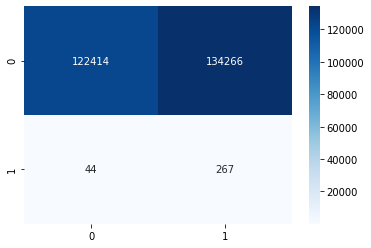

In [43]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [44]:
print(classification_report(test_y,pred1_dt))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65    256680
           1       0.00      0.86      0.00       311

    accuracy                           0.48    256991
   macro avg       0.50      0.67      0.32    256991
weighted avg       1.00      0.48      0.64    256991



In [45]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

47.69128876422004
85.85209003215434
99.96406931356057
0.19846431730504785
47.737469405543386


In [46]:
pred1_prob_dt=dt.predict_proba(top_test_x)

In [47]:
pred1_prob_dt=pd.DataFrame(pred1_prob_dt)

In [48]:
roc_auc = roc_auc_score(test_y,pred1_dt)
roc_auc


0.6677168939818718

In [49]:
fpr, tpr, threshold = roc_curve( test_y ,  pred1_prob_dt.iloc[:,1] )



In [50]:
fpr, tpr, threshold

(array([0.        , 0.52308711, 1.        ]),
 array([0.       , 0.8585209, 1.       ]),
 array([2., 1., 0.]))

Text(0.2, 0.6, 'Area under curve is 0.6677168939818718')

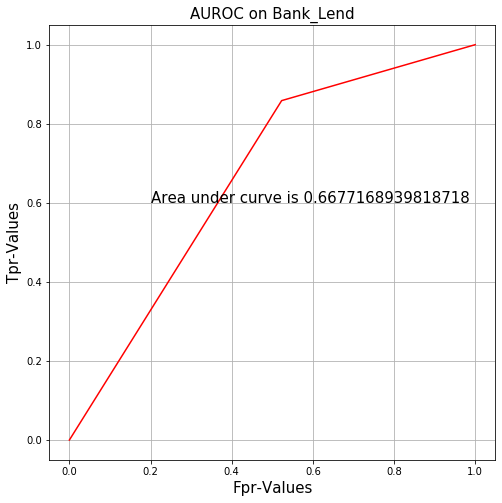

In [51]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


##### BEST HYPERPARAMETERS

In [52]:
from sklearn.model_selection import GridSearchCV


In [53]:
dt1=DecisionTreeClassifier(random_state=0)

In [54]:
search_dict = {"criterion" :["gini" , "entropy"],
               "max_depth" : range(3,10)}


In [55]:
grid = GridSearchCV(dt1 ,  param_grid =  search_dict)


In [56]:
grid.fit(top_train_x, train_y)   
#Note-We are building the model on tope features and balance dataset.

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10)})

In [57]:
grid.best_params_   


{'criterion': 'gini', 'max_depth': 9}

In [58]:
pred_grid = grid.predict(top_test_x)
pred_grid

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
tab=confusion_matrix(test_y,pred_grid)
print(tab)

[[221810  34870]
 [    95    216]]


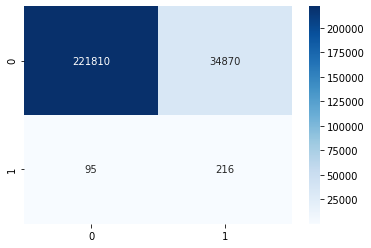

In [60]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [61]:
print(classification_report(test_y,pred_grid))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93    256680
           1       0.01      0.69      0.01       311

    accuracy                           0.86    256991
   macro avg       0.50      0.78      0.47    256991
weighted avg       1.00      0.86      0.93    256991



In [62]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

86.41499142901668
69.45337620578779
99.95718888713638
0.615630165878128
86.39446517582327


In [63]:
pred_prob_grid_dt=grid.predict_proba(top_test_x)

In [64]:
pred_prob_grid_dt=pd.DataFrame(pred_prob_grid_dt)

In [65]:
roc_auc = roc_auc_score(test_y,pred_grid)
roc_auc


0.7793418381740224

In [66]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_prob_grid_dt.iloc[:,1] )



In [67]:
fpr, tpr, threshold

(array([0.        , 0.13535531, 0.13535531, 0.13540595, 0.13540985,
        0.13547998, 0.13549166, 0.13563581, 0.13575658, 0.13576048,
        0.1358345 , 0.13585009, 0.13594359, 0.13598644, 0.13599034,
        0.13607215, 0.13608384, 0.13615397, 0.1363098 , 0.13631759,
        0.13635266, 0.13639551, 0.13647343, 0.13647733, 0.13648901,
        0.13664095, 0.13664875, 0.13675393, 0.13679289, 0.13683575,
        0.13689808, 0.14199392, 0.14200171, 0.14336528, 0.14899875,
        0.15116487, 0.15118435, 0.17716223, 0.25261415, 0.25270765,
        0.27007168, 0.28357878, 0.28388266, 0.31646798, 0.3171108 ,
        0.31722378, 0.4604527 , 0.66817438, 0.66822503, 0.68119448,
        0.92991273, 0.95879305, 1.        ]),
 array([0.        , 0.22186495, 0.22829582, 0.33118971, 0.33118971,
        0.38906752, 0.40514469, 0.5755627 , 0.63665595, 0.63665595,
        0.67524116, 0.69453376, 0.70096463, 0.70418006, 0.70418006,
        0.73311897, 0.73633441, 0.76848875, 0.79742765, 0.79742765,
  

Text(0.2, 0.6, 'Area under curve is 0.7793418381740224')

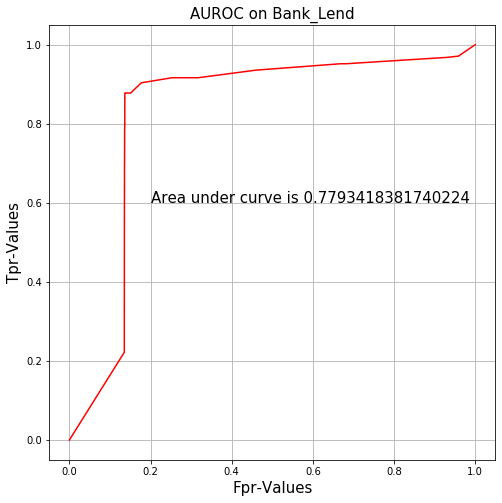

In [68]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


###### ON BALANCE DATSET

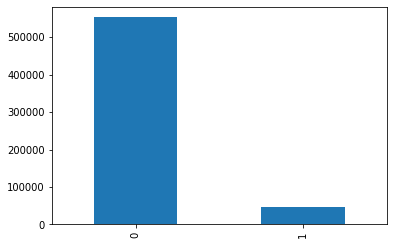

In [71]:
train_y.value_counts().plot.bar()

In [72]:
train_y.value_counts()

0    552822
1     46156
Name: default_ind, dtype: int64

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
strat={1:200000}

In [71]:
 smote=SMOTE(sampling_strategy=strat)

In [72]:
train_x_bl,train_y_bl=smote.fit_sample(top_train_x,train_y)

In [73]:
train_y_bl.value_counts()

0    552822
1    200000
Name: default_ind, dtype: int64

In [74]:
dt_bl=DecisionTreeClassifier(random_state=0,criterion= 'entropy', max_depth= 9)

In [75]:
dt_bl.fit(train_x_bl,train_y_bl)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

In [76]:
pred_dt_bl=dt_bl.predict(top_test_x)

In [77]:
tab=confusion_matrix(test_y,pred_dt_bl)
print(tab)

[[224185  32495]
 [    59    252]]


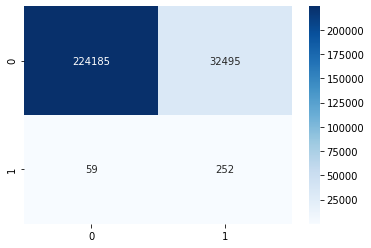

In [78]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [79]:
print(classification_report(test_y,pred_dt_bl))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    256680
           1       0.01      0.81      0.02       311

    accuracy                           0.87    256991
   macro avg       0.50      0.84      0.47    256991
weighted avg       1.00      0.87      0.93    256991



In [80]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

87.34026803802399
81.02893890675242
99.97368937407467
0.7695361407151801
87.3326303255756


In [81]:
pred_prob_dt_bl=dt_bl.predict_proba(top_test_x)

In [82]:
pred_prob_dt_bl=pd.DataFrame(pred_prob_dt_bl)

In [83]:
roc_auc = roc_auc_score(test_y,pred_dt_bl)
roc_auc


0.841846034723882

In [84]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_prob_dt_bl.iloc[:,1] )



In [85]:
fpr, tpr, threshold

(array([0.        , 0.07837775, 0.11855618, 0.11878993, 0.11879383,
        0.11896914, 0.1190081 , 0.11906265, 0.11907823, 0.11918342,
        0.119199  , 0.11944055, 0.1265194 , 0.1265233 , 0.12655446,
        0.12658563, 0.12659732, 0.1266207 , 0.13065685, 0.13066854,
        0.13083996, 0.13084775, 0.1308906 , 0.13089839, 0.13094125,
        0.13124903, 0.13126461, 0.13137759, 0.13138928, 0.13142434,
        0.16255259, 0.16261493, 0.16261882, 0.16282141, 0.16719261,
        0.17180146, 0.1754792 , 0.17550257, 0.17550647, 0.17554932,
        0.17558828, 0.17568178, 0.17570905, 0.17571295, 0.1757558 ,
        0.17578308, 0.1758532 , 0.17620383, 0.17627006, 0.20552439,
        0.25315178, 0.32551815, 0.32555711, 0.37582204, 0.37774661,
        0.37777778, 0.37780115, 0.37911797, 0.38190354, 0.38192302,
        0.3906849 , 0.48945379, 0.49285881, 0.56553296, 0.565681  ,
        0.58157239, 0.58415926, 0.59235624, 0.69317048, 0.69320944,
        0.69322892, 0.69326399, 0.72318841, 0.72

Text(0, 0.6, 'AUC is 0.841846034723882')

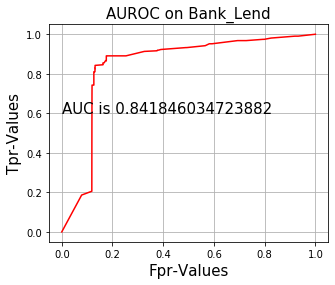

In [86]:
plt.figure(figsize = (5,4))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0, y = 0.6 , s = "AUC is {}".format(roc_auc), size = 15)


In [87]:
sns.heatmap(confusion_matrix(test_y,dt_bl_pred),annot=True,fmt='d',cmap="Blues")

NameError: name 'dt_bl_pred' is not defined

### RAMDOM FOREST

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf=RandomForestClassifier(random_state=0)

##### ON INITIAL DATA

In [ ]:
rf.fit(train_x,train_y)

In [ ]:
pred_rf=rf.predict(test_x)

In [ ]:
tab=confusion_matrix(test_y,pred_rf)
print(tab)

In [ ]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [ ]:
print(classification_report(test_y,pred_rf))

In [ ]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

In [ ]:
pred_prob_rf=rf.predict_proba(test_x)

In [ ]:
pred_prob_rf=pd.DataFrame(pred_prob_rf)

In [ ]:
roc_auc = roc_auc_score(test_y,pred_rf)
roc_auc


In [ ]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_prob_rf.iloc[:,1])



In [ ]:
fpr, tpr, threshold

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


##### ON TOP FEATURES

In [90]:
rf.fit(top_train_x,train_y)

RandomForestClassifier(random_state=0)

In [91]:
pred1_rf=rf.predict(top_test_x)

In [92]:
tab=confusion_matrix(test_y,pred1_rf)
print(tab)

[[200021  56659]
 [    35    276]]


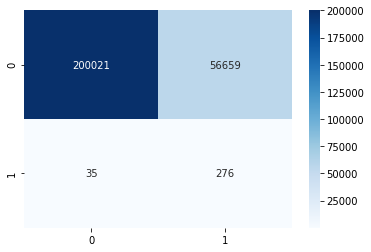

In [93]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [94]:
print(classification_report(test_y,pred1_rf))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88    256680
           1       0.00      0.89      0.01       311

    accuracy                           0.78    256991
   macro avg       0.50      0.83      0.44    256991
weighted avg       1.00      0.78      0.87    256991



In [95]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

77.92621162537012
88.7459807073955
99.98250489862839
0.48476332660050936
77.93930526749963


In [96]:
pred1_prob_rf=rf.predict_proba(top_test_x)

In [97]:
pred1_prob_rf=pd.DataFrame(pred1_prob_rf)

In [98]:
roc_auc = roc_auc_score(test_y,pred1_rf)
roc_auc


0.8333609616638281

In [99]:
fpr, tpr, threshold = roc_curve( test_y ,  pred1_prob_rf.iloc[:,1])



In [100]:
fpr, tpr, threshold

(array([0.00000000e+00, 0.00000000e+00, 3.89590151e-06, 1.55836060e-05,
        2.72713106e-05, 6.23344242e-05, 1.20772947e-04, 2.33754091e-04,
        4.09069659e-04, 6.85678666e-04, 1.05578931e-03, 1.63627863e-03,
        2.36481222e-03, 3.44397694e-03, 4.67897772e-03, 6.21006701e-03,
        7.97101449e-03, 9.93844476e-03, 1.21902758e-02, 1.47498831e-02,
        1.75315568e-02, 2.04262116e-02, 2.36247468e-02, 2.72557270e-02,
        3.13269441e-02, 3.55306218e-02, 4.02992052e-02, 4.53132305e-02,
        5.05454262e-02, 5.64594047e-02, 6.21863799e-02, 6.82406109e-02,
        7.46844320e-02, 8.12879850e-02, 8.82304815e-02, 9.54184198e-02,
        1.02879071e-01, 1.10452704e-01, 1.18287362e-01, 1.26114228e-01,
        1.34295621e-01, 1.42328970e-01, 1.50775284e-01, 1.59139785e-01,
        1.67434159e-01, 1.76098644e-01, 1.84544959e-01, 1.93525012e-01,
        2.02703756e-01, 2.11796790e-01, 2.20737884e-01, 2.29277700e-01,
        2.38008415e-01, 2.46594982e-01, 2.55193237e-01, 2.635966

Text(0.2, 0.6, 'Area under curve is 0.8333609616638281')

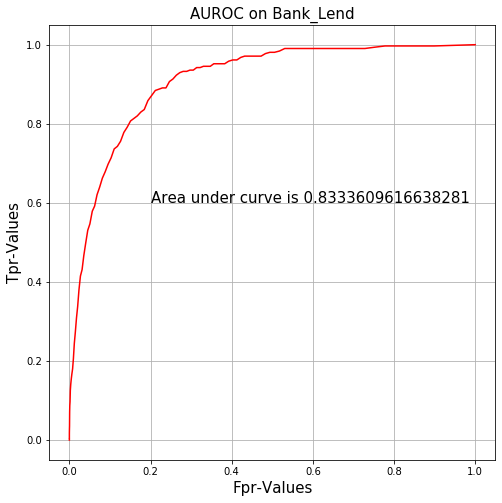

In [101]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


##### GRIDE SEARCH

In [102]:
rf=RandomForestClassifier(n_estimators=20,random_state=0)

In [168]:
search_dict = {"criterion" :["gini" , "entropy"],
               "max_depth" : range(3,10)}


In [169]:
grid = GridSearchCV(rf ,  param_grid =  search_dict)


In [170]:
grid.fit(top_train_x, train_y)   
#Note-We are building the model on tope features and balance dataset.

GridSearchCV(estimator=RandomForestClassifier(n_estimators=20, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10)})

In [171]:
grid.best_params_   


{'criterion': 'entropy', 'max_depth': 8}

In [172]:
pred_grid_rf = grid.predict(top_test_x)
pred_grid

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [173]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [174]:
tab=confusion_matrix(test_y,pred_grid_rf)
print(tab)

[[256044    636]
 [   237     74]]


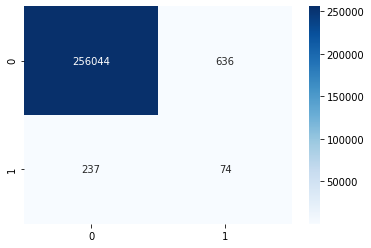

In [175]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [176]:
print(classification_report(test_y,pred_grid_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.10      0.24      0.14       311

    accuracy                           1.00    256991
   macro avg       0.55      0.62      0.57    256991
weighted avg       1.00      1.00      1.00    256991



In [177]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

99.7522206638616
23.79421221864952
99.90752338253714
10.422535211267606
99.66029938791631


In [178]:
pred_prob_grid_rf=grid.predict_proba(top_test_x)

In [179]:
pred_prob_grid_rf=pd.DataFrame(pred_prob_grid_rf)

In [180]:
roc_auc = roc_auc_score(test_y,pred_grid_rf)
roc_auc


0.6177321644125557

In [181]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_grid_rf )



In [182]:
fpr, tpr, threshold

(array([0.        , 0.00247779, 1.        ]),
 array([0.        , 0.23794212, 1.        ]),
 array([2, 1, 0], dtype=int64))

Text(0.2, 0.6, 'Area under curve is 0.6177321644125557')

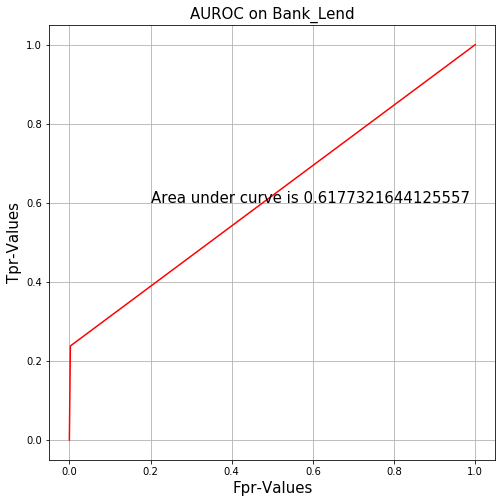

In [183]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


##### ON BALANCED DATA SET

In [184]:
rf=RandomForestClassifier(random_state=0,max_depth=9)

In [185]:
rf.fit(train_x_bl,train_y_bl)

RandomForestClassifier(max_depth=9, random_state=0)

In [186]:
pred4_bl=rf.predict(top_test_x)

In [187]:
tab=confusion_matrix(test_y,pred4_bl)
print(tab)

[[254005   2675]
 [   100    211]]


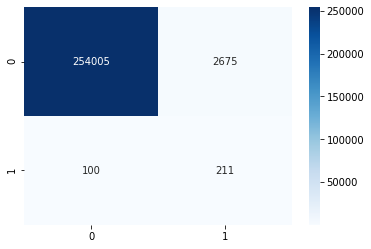

In [188]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [189]:
print(classification_report(test_y,pred4_bl))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    256680
           1       0.07      0.68      0.13       311

    accuracy                           0.99    256991
   macro avg       0.54      0.83      0.56    256991
weighted avg       1.00      0.99      0.99    256991



In [190]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

98.95784634564438
67.84565916398714
99.9606461895673
7.311157311157311
98.92019564887487


In [191]:
pred4_prob_rf_bl=rf.predict_proba(top_test_x)

In [192]:
pred4_prob_rf_bl=pd.DataFrame(pred4_prob_rf_bl)

In [193]:
roc_auc = roc_auc_score(test_y,pred4_bl)
roc_auc


0.8340175275481576

In [194]:
fpr, tpr, threshold = roc_curve( test_y ,  pred4_bl )



In [195]:
fpr, tpr, threshold

(array([0.        , 0.01042154, 1.        ]),
 array([0.        , 0.67845659, 1.        ]),
 array([2, 1, 0], dtype=int64))

Text(0.1, 0.6, 'AUC is 0.8340175275481576')

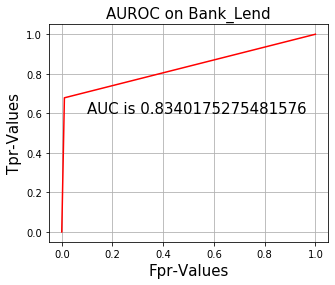

In [196]:
plt.figure(figsize = (5,4))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.1, y = 0.6 , s = "AUC is {}".format(roc_auc), size = 15)


### CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
score_rf=cross_val_score(rf,top_train_x,train_y,scoring="accuracy",cv=10)

In [ ]:
print(score_rf.mean())
print(score_rf.min())
print(score_rf.max())

In [ ]:
score_rf

In [ ]:
score_rf_bl=cross_val_score(rf,train_x_bl,train_y_bl,scoring="accuracy",cv=10)

In [ ]:
print(score_rf_bl.mean())
print(score_rf_bl.min())
print(score_rf_bl.max())

In [ ]:
score_rf_bl

In [ ]:
score_dt=cross_val_score(dt,train_x_bl,train_y_bl,scoring="accuracy",cv=10)

In [ ]:
print(score_dt.mean())
print(score_dt.min())
print(score_dt.max())

In [ ]:
score_dt

### ADA BOOST

In [153]:
from sklearn.ensemble import AdaBoostClassifier


In [154]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [155]:
abc=AdaBoostClassifier()

In [156]:
abc.fit(train_x_bl,train_y_bl)

AdaBoostClassifier()

In [157]:
pred_abc=abc.predict(top_test_x)

In [158]:
tab=confusion_matrix(test_y,pred_abc)
print(tab)

[[256093    587]
 [   112    199]]


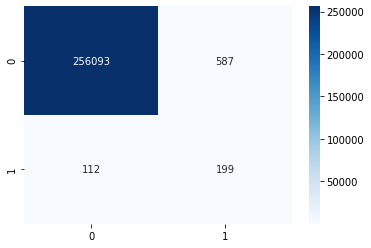

In [159]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [160]:
print(classification_report(test_y,pred_abc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.25      0.64      0.36       311

    accuracy                           1.00    256991
   macro avg       0.63      0.82      0.68    256991
weighted avg       1.00      1.00      1.00    256991



In [161]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

99.77131058126851
63.9871382636656
99.95628500614741
25.318066157760814
99.728006039122


In [162]:
pred_prob_abc=abc.predict_proba(top_test_x)

In [163]:
pred_prob_abc=pd.DataFrame(pred_prob_abc)

In [164]:
roc_auc = roc_auc_score(test_y,pred_abc)
roc_auc


0.8187922442246706

In [165]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_prob_abc.iloc[:,1] )



In [166]:
fpr, tpr, threshold

(array([0.        , 0.        , 0.        , ..., 0.99977793, 0.99978573,
        1.        ]),
 array([0.        , 0.00321543, 0.0096463 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.67511792, 0.67511792, 0.53241621, ..., 0.43865486, 0.43860481,
        0.4254277 ]))

Text(0, 0.6, 'AUC is 0.8187922442246706')

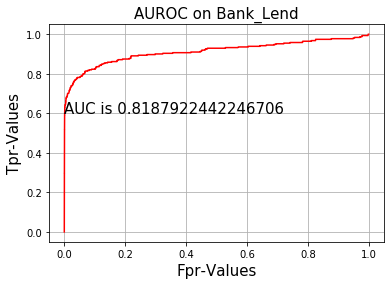

In [167]:
plt.figure(figsize = (6,4))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0, y = 0.6 , s = "AUC is {}".format(roc_auc), size = 15)


#### LOGISTIC REGRESSION

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
lm=LogisticRegression(penalty='l1',solver='liblinear',
    C=1.0,
    random_state=0,
    max_iter=150,
    multi_class='auto',
     )

In [112]:
lm.fit(top_train_x,train_y)

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(max_iter=150, penalty='l1', random_state=0,
                   solver='liblinear')

In [113]:
pred_lm=lm.predict(top_test_x)

In [114]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [115]:
tab=confusion_matrix(test_y,pred_lm)
print(tab)

[[256529    151]
 [   214     97]]


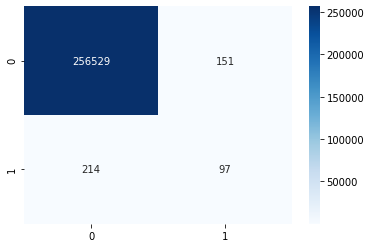

In [116]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [117]:
print(classification_report(test_y,pred_lm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.39      0.31      0.35       311

    accuracy                           1.00    256991
   macro avg       0.70      0.66      0.67    256991
weighted avg       1.00      1.00      1.00    256991



In [118]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

99.94117188717469
31.189710610932476
99.9166481656754
39.11290322580645
99.8579716799421


In [119]:
pred_prob_lm=lm.predict_proba(top_test_x)

In [120]:
pred_prob_lm=pd.DataFrame(pred_prob_lm)

In [121]:
roc_auc = roc_auc_score(test_y,pred_lm)
roc_auc


0.6556544124905359

In [122]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_prob_lm.iloc[:,1] )



In [123]:
fpr, tpr, threshold

(array([0.00000000e+00, 7.79180302e-06, 7.79180302e-06, 1.16877045e-05,
        1.16877045e-05, 1.55836060e-05, 1.55836060e-05, 1.94795076e-05,
        1.94795076e-05, 2.72713106e-05, 2.72713106e-05, 5.06467197e-05,
        5.06467197e-05, 5.45426212e-05, 5.45426212e-05, 6.23344242e-05,
        6.23344242e-05, 6.62303257e-05, 6.62303257e-05, 7.01262272e-05,
        7.01262272e-05, 7.40221287e-05, 7.40221287e-05, 8.57098333e-05,
        8.57098333e-05, 8.96057348e-05, 8.96057348e-05, 9.35016363e-05,
        9.35016363e-05, 1.12981144e-04, 1.12981144e-04, 1.16877045e-04,
        1.16877045e-04, 1.28564750e-04, 1.28564750e-04, 1.40252454e-04,
        1.40252454e-04, 1.55836060e-04, 1.55836060e-04, 1.71419667e-04,
        1.71419667e-04, 1.79211470e-04, 1.79211470e-04, 1.87003273e-04,
        1.87003273e-04, 2.02586879e-04, 2.02586879e-04, 2.18170485e-04,
        2.18170485e-04, 2.29858189e-04, 2.29858189e-04, 2.33754091e-04,
        2.33754091e-04, 2.37649992e-04, 2.37649992e-04, 2.454417

Text(0.2, 0.6, 'Area under curve is 0.6556544124905359')

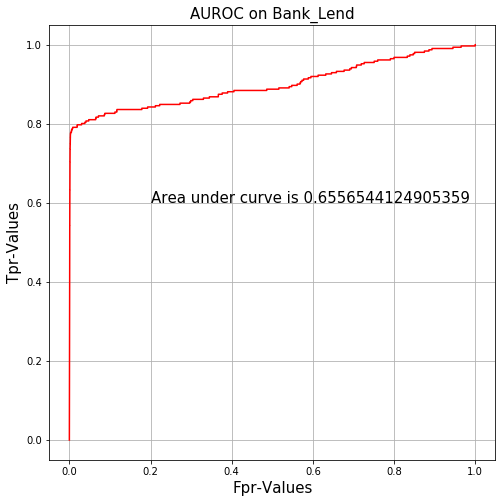

In [124]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


In [126]:
lm1=LogisticRegression(penalty='l2',solver='liblinear',
    C=1.0,
    random_state=0,
    max_iter=150,
    multi_class='auto',
     )

In [127]:
lm1.fit(top_train_x,train_y)

LogisticRegression(max_iter=150, random_state=0, solver='liblinear')

In [128]:
pred1_lm=lm1.predict(top_test_x)

In [129]:
tab=confusion_matrix(test_y,pred1_lm)
print(tab)

[[256490    190]
 [   168    143]]


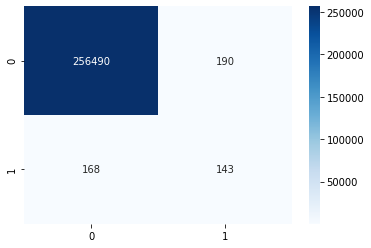

In [130]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [131]:
print(classification_report(test_y,pred1_lm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.43      0.46      0.44       311

    accuracy                           1.00    256991
   macro avg       0.71      0.73      0.72    256991
weighted avg       1.00      1.00      1.00    256991



In [132]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

99.92597787127941
45.98070739549839
99.93454324431734
42.94294294294294
99.86069551073773


In [133]:
pred1_prob_lm=lm1.predict_proba(top_test_x)

In [134]:
pred1_prob_lm=pd.DataFrame(pred1_prob_lm)

In [135]:
roc_auc = roc_auc_score(test_y,pred1_lm)
roc_auc


0.7295334263338891

In [136]:
fpr, tpr, threshold = roc_curve( test_y ,  pred1_prob_lm.iloc[:,1] )



In [137]:
fpr, tpr, threshold

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.89590151e-06,
        3.89590151e-06, 1.16877045e-05, 1.16877045e-05, 1.55836060e-05,
        1.55836060e-05, 1.94795076e-05, 1.94795076e-05, 2.72713106e-05,
        2.72713106e-05, 5.06467197e-05, 5.06467197e-05, 5.45426212e-05,
        5.45426212e-05, 5.84385227e-05, 5.84385227e-05, 6.62303257e-05,
        6.62303257e-05, 7.40221287e-05, 7.40221287e-05, 8.57098333e-05,
        8.57098333e-05, 9.35016363e-05, 9.35016363e-05, 9.73975378e-05,
        9.73975378e-05, 1.12981144e-04, 1.12981144e-04, 1.24668848e-04,
        1.24668848e-04, 1.28564750e-04, 1.28564750e-04, 1.71419667e-04,
        1.71419667e-04, 1.79211470e-04, 1.79211470e-04, 1.90899174e-04,
        1.90899174e-04, 2.02586879e-04, 2.02586879e-04, 2.22066386e-04,
        2.22066386e-04, 2.29858189e-04, 2.29858189e-04, 2.33754091e-04,
        2.33754091e-04, 2.49337697e-04, 2.49337697e-04, 2.72713106e-04,
        2.72713106e-04, 2.84400810e-04, 2.84400810e-04, 2.882967

Text(0.2, 0.6, 'Area under curve is 0.7295334263338891')

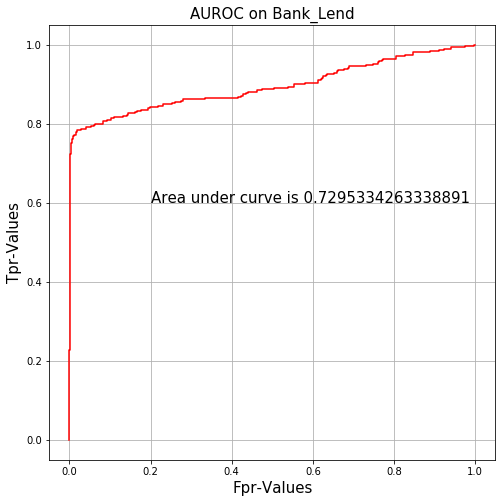

In [138]:
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.2, y = 0.6 , s = "Area under curve is {}".format(roc_auc), size = 15)


In [139]:
# Chosing only imp features for tis model

In [140]:
lm2=LogisticRegression(penalty='l2',solver='liblinear',
    C=1.0,
    random_state=0,
    max_iter=150,
    multi_class='auto',
     )

In [141]:
lm2.fit(train_x_bl,train_y_bl)

LogisticRegression(max_iter=150, random_state=0, solver='liblinear')

In [142]:
pred2_lm=lm2.predict(top_test_x)

In [143]:
tab=confusion_matrix(test_y,pred2_lm)
print(tab)

[[256329    351]
 [   109    202]]


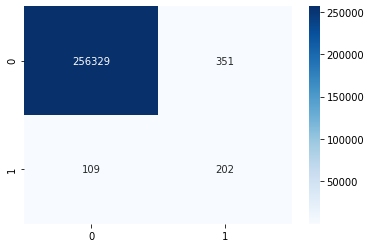

In [144]:
sns.heatmap(tab,annot=True,fmt='d',cmap="Blues")

In [145]:
print(classification_report(test_y,pred2_lm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.37      0.65      0.47       311

    accuracy                           1.00    256991
   macro avg       0.68      0.82      0.73    256991
weighted avg       1.00      1.00      1.00    256991



In [146]:
sensitivity=(tab[0,0])/(tab[0,0]+tab[0,1])*100
specificity=(tab[1,1])/(tab[1,1]+tab[1,0])*100
precision_0=(tab[0,0])/(tab[0,0]+tab[1,0])*100
precision_1=(tab[1,1])/(tab[1,1]+tab[0,1])*100
accuracy=(tab.diagonal().sum())/(tab.sum())*100
print(sensitivity)
print(specificity)
print(precision_0)
print(precision_1)
print(accuracy)

99.86325385694249
64.95176848874597
99.95749459908438
36.52802893309223
99.82100540485852


In [147]:
pred2_prob_lm=lm2.predict_proba(top_test_x)

In [148]:
pred2_prob_lm=pd.DataFrame(pred2_prob_lm)

In [149]:
roc_auc = roc_auc_score(test_y,pred2_lm)
roc_auc


0.8240751117284423

In [150]:
fpr, tpr, threshold = roc_curve( test_y ,  pred2_lm )



In [151]:
fpr, tpr, threshold

(array([0.        , 0.00136746, 1.        ]),
 array([0.        , 0.64951768, 1.        ]),
 array([2, 1, 0], dtype=int64))

Text(0.1, 0.6, 'AUC is 0.8240751117284423')

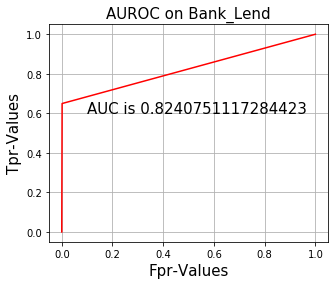

In [152]:
plt.figure(figsize = (5,4))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Bank_Lend", size = 15)
plt.text(x= 0.1, y = 0.6 , s = "AUC is {}".format(roc_auc), size = 15)


In [197]:
train_x_bl.columns

Index(['funded_amnt', 'revol_util', 'out_prncp_inv', 'total_rec_int', 'term',
       'int_rate', 'grade', 'sub_grade', 'annual_inc', 'dti', 'total_acc',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')